In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/online-retail-customer-clustering/OnlineRetail.csv


# Importamos el CSV

In [2]:
df = pd.read_csv('../input/online-retail-customer-clustering/OnlineRetail.csv', encoding = 'unicode_escape')

# Visualizacion de los datos

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [4]:
df.shape

(541909, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
df.dropna()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


In [8]:
DateIndex = df.set_index('InvoiceDate')
DateIndex.tail()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
09-12-2011 12:50,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France
09-12-2011 12:50,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France
09-12-2011 12:50,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France
09-12-2011 12:50,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France
09-12-2011 12:50,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,4.95,12680.0,France


In [9]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


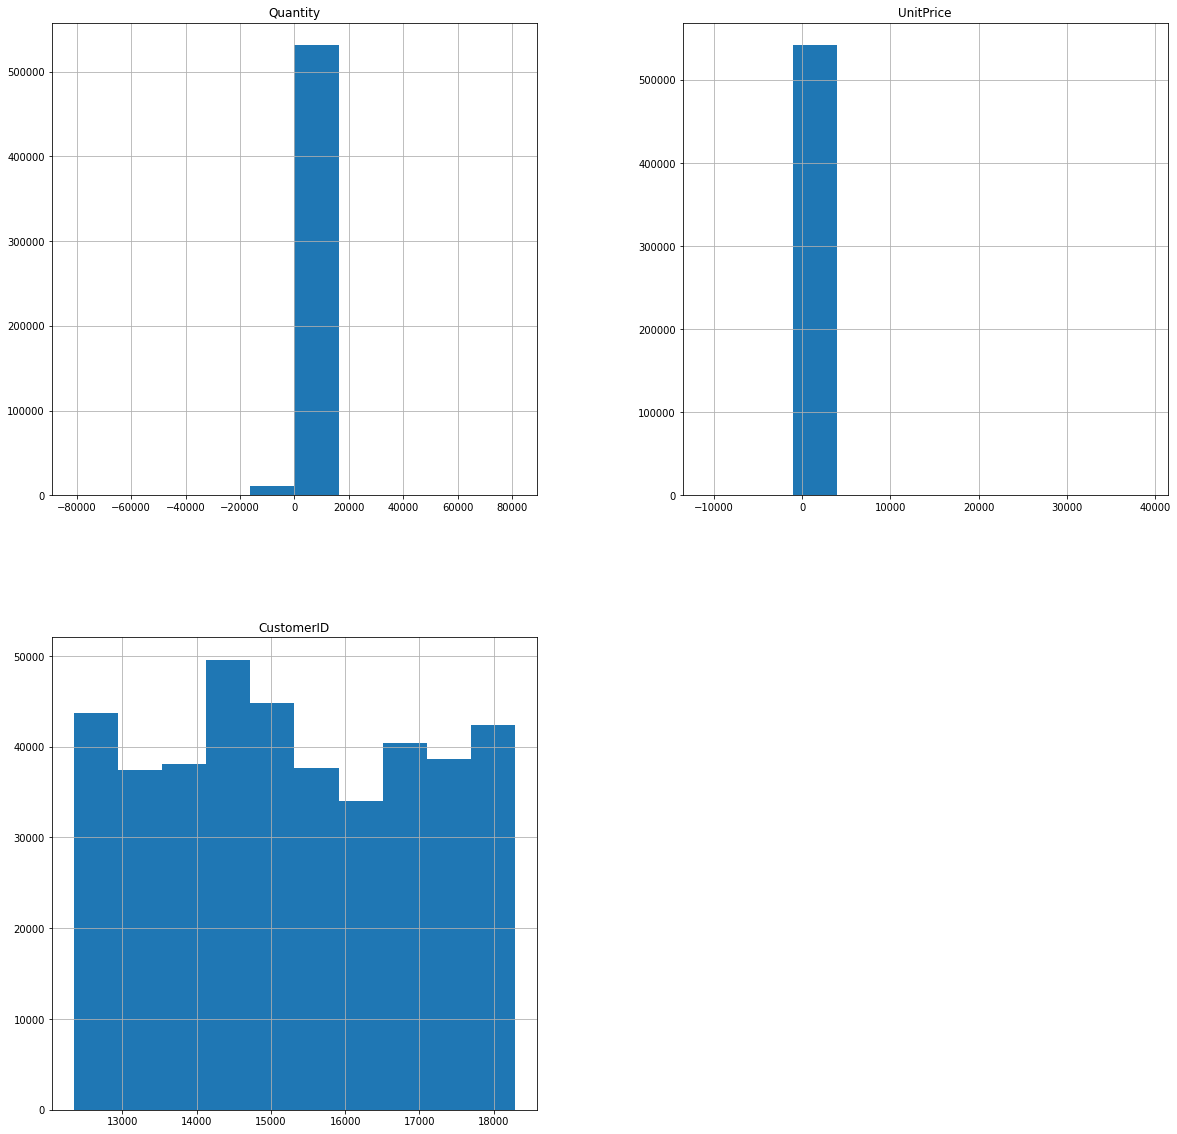

In [10]:
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

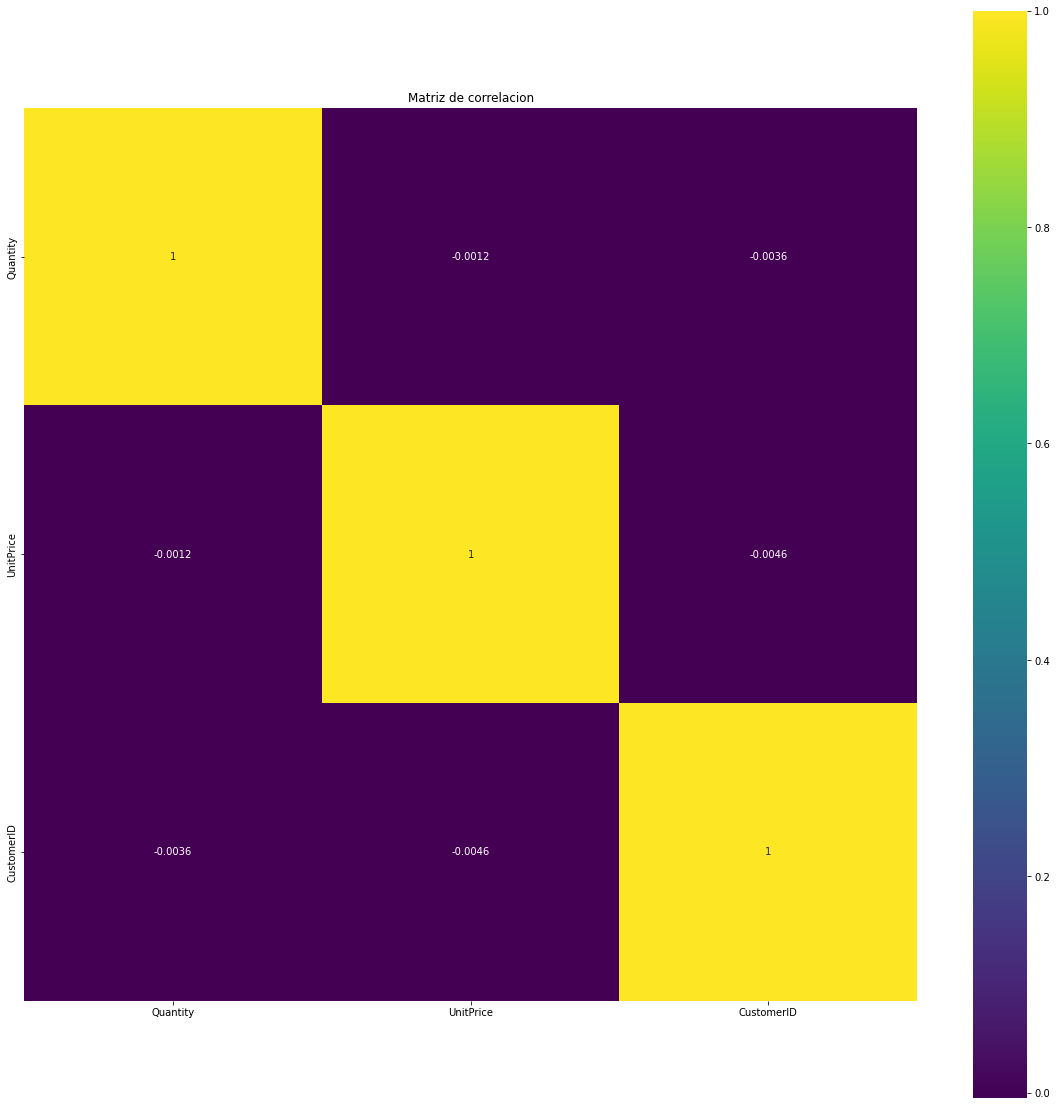

In [11]:
cor = df.corr()
plt.figure(figsize=(20,20))
ax = sns.heatmap(cor, vmax=1, square=True, annot=True, cmap='viridis')
plt.title("Matriz de correlacion")
plt.show()

# Analisis de los datos

In [12]:
DateIndex['Years'] = pd.DatetimeIndex(DateIndex.index).year
DateIndex['Month'] = pd.DatetimeIndex(DateIndex.index).month
DateIndex

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Years,Month
InvoiceDate,,,,,,,,,
01-12-2010 08:26,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010,1
01-12-2010 08:26,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010,1
01-12-2010 08:26,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010,1
01-12-2010 08:26,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010,1
01-12-2010 08:26,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010,1
...,...,...,...,...,...,...,...,...,...
09-12-2011 12:50,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,2011,9
09-12-2011 12:50,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,2011,9
09-12-2011 12:50,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,2011,9


In [13]:
firstYear = DateIndex[DateIndex['Years'] == 2010]

In [14]:
Sells2010 = firstYear['Month'].value_counts()
Sells2010

12    17200
6      3878
1      3108
7      2963
9      2891
10     2758
5      2725
8      2647
3      2202
2      2109
Name: Month, dtype: int64

In [15]:
SecondYear = DateIndex[DateIndex['Years'] == 2011]
Sells2011 = SecondYear['Month'].value_counts()
Sells2011

11    73594
10    54162
9     48398
7     44134
6     42241
8     42240
5     39934
4     37180
1     36661
3     36467
2     31732
12    12685
Name: Month, dtype: int64

In [16]:
Country = df['Country'].value_counts()
cd = Country.head(3)

Text(0.5, 1.0, 'Model Cars')

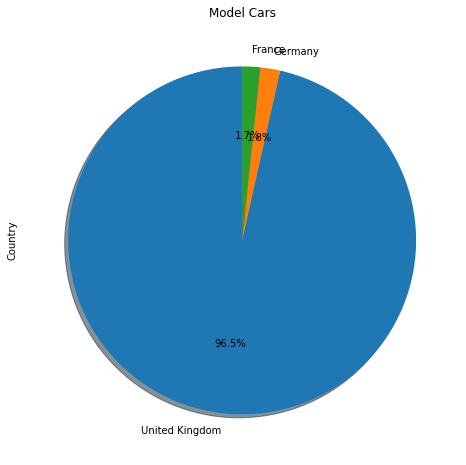

In [17]:
cd.plot.pie(startangle = 90, shadow = True, autopct = '%1.1f%%',figsize = (8,8))
plt.title('Model Cars')

# Preprocesamiento

In [18]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [19]:
cut = df.drop(columns = ['Description', 'InvoiceDate', 'CustomerID'])

In [20]:
from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()
cut['Country'] = encoder.fit_transform(cut['Country'])
cut['InvoiceNo'] = encoder.fit_transform(cut['InvoiceNo'])
cut['StockCode'] = encoder.fit_transform(cut['StockCode'])

In [21]:
cut.shape
dt = cut

In [22]:
array = dt.values
X = array[:, 0:4]
Y = array[:, 4]

In [23]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler = MinMaxScaler(feature_range=(0,1))
rescalerX = scaler.fit_transform(X)

estandar = StandardScaler().fit(rescalerX)
estandarX = estandar.transform(rescalerX)

X = estandarX

# Clusters

In [24]:
from sklearn.cluster import KMeans

In [25]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,max_iter = 300, random_state=0).fit(X)
    wcss.append(kmeans.inertia_)

<function matplotlib.pyplot.show(close=None, block=None)>

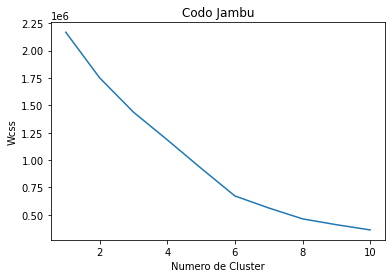

In [26]:
plt.plot(range(1, 11), wcss)
plt.title('Codo Jambu')
plt.xlabel('Numero de Cluster')
plt.ylabel('Wcss')
plt.show

In [27]:
clustering = KMeans(n_clusters=6, random_state=0).fit(X)

In [28]:
dt['Cluster'] = clustering.labels_
dt.head()

,InvoiceNo,StockCode,Quantity,UnitPrice,Country,Cluster
0,0,3536,6,2.55,36,0
1,0,2794,6,3.39,36,0
2,0,3044,8,2.75,36,0
3,0,2985,6,3.39,36,0
4,0,2984,6,3.39,36,0
